In [13]:
%load_ext autoreload
%autoreload 2
from methods2final import * 

sc.settings.verbosity = 3  
sc.logging.print_versions()
results_file = '../dat/write/der20.h5ad'
sc.settings.set_figure_params(dpi=160)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
scanpy==1.4.1 anndata==0.6.19 numpy==1.16.2 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 


In [5]:
adata = sc.read_csv('../dat/DER-20_exp_mat.csv', delimiter=',')
adata.var_names_make_unique()
adata.obs["ID"] = adata.obs.index
adata.obs["cell"] = adata.obs.apply(lambda row:row["ID"].split(".")[0], axis=1)
adata.obs.head(3)

,ID,cell
Fetal-IntN,Fetal-IntN,Fetal-IntN
Fetal-ExN,Fetal-ExN,Fetal-ExN
Fetal-ExN.1,Fetal-ExN.1,Fetal-ExN


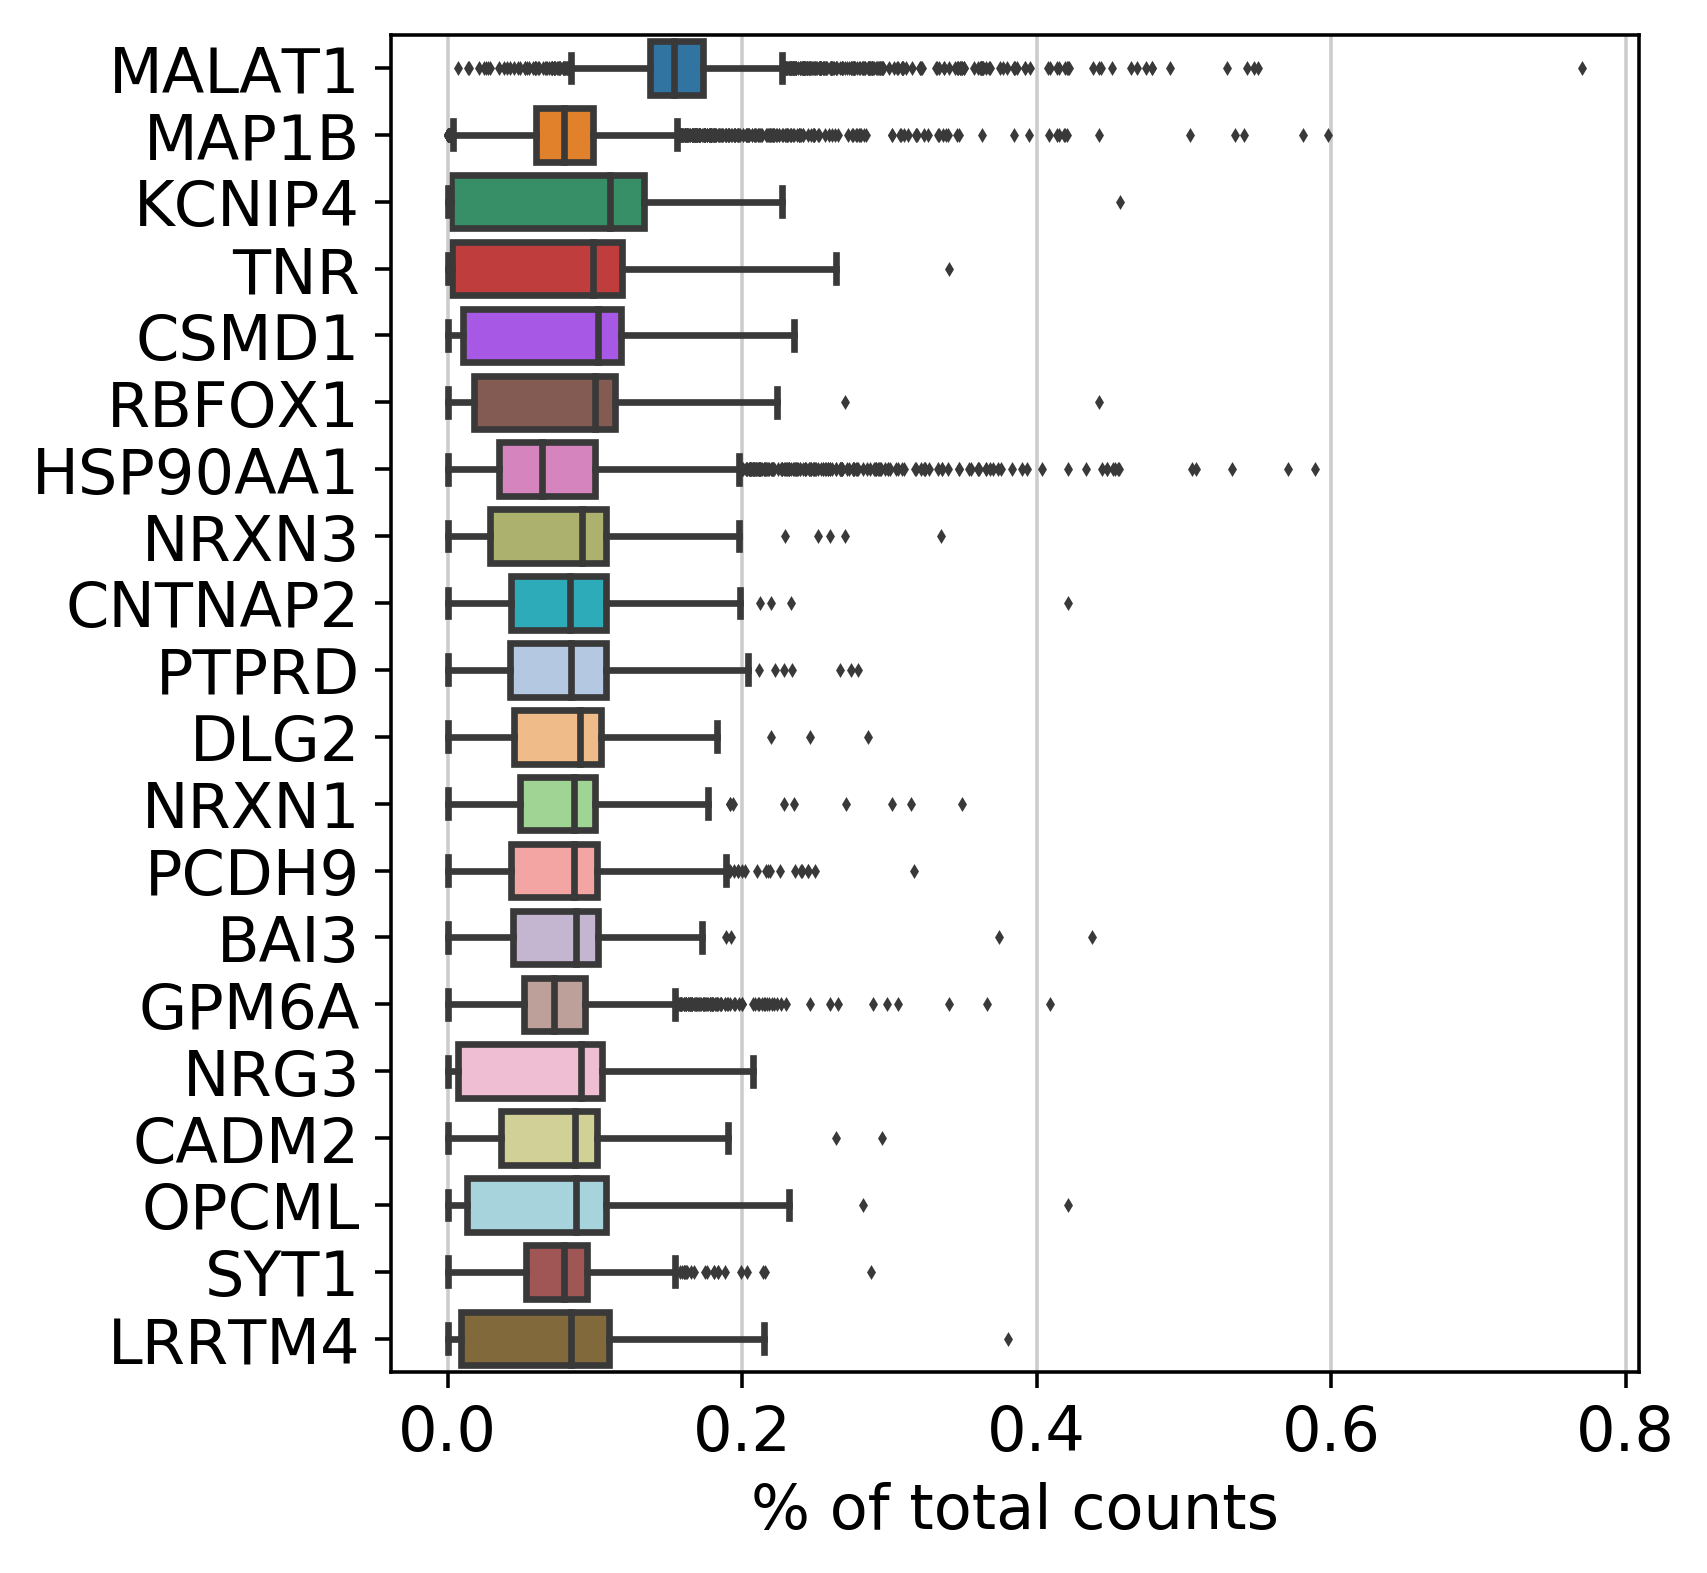

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

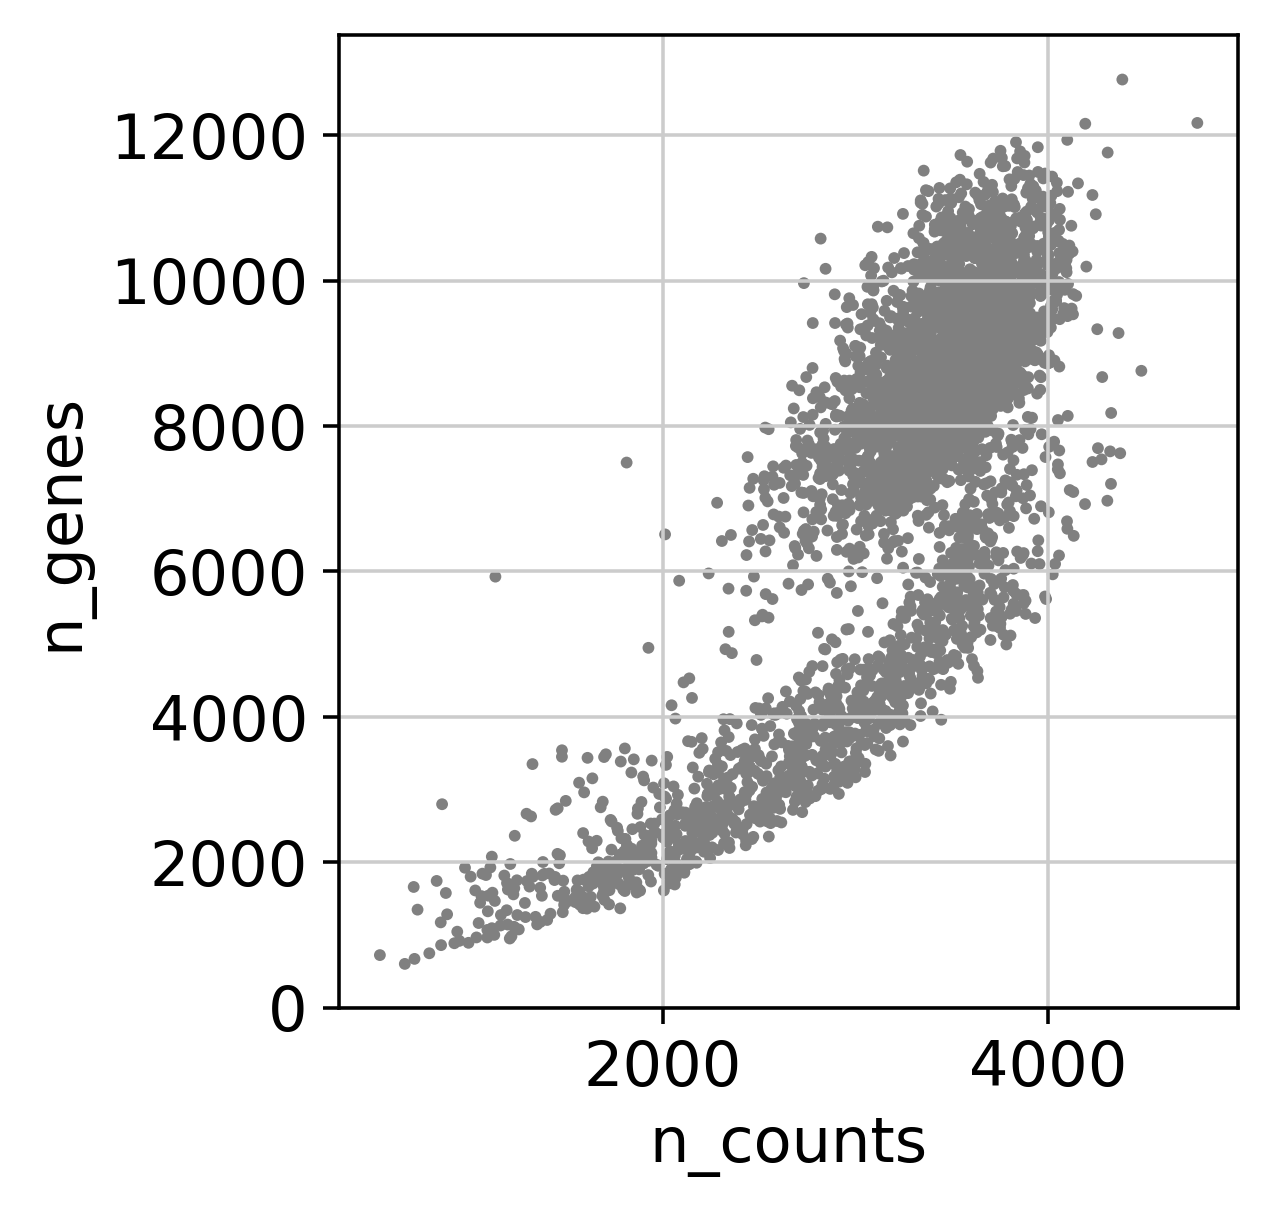

In [16]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [17]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


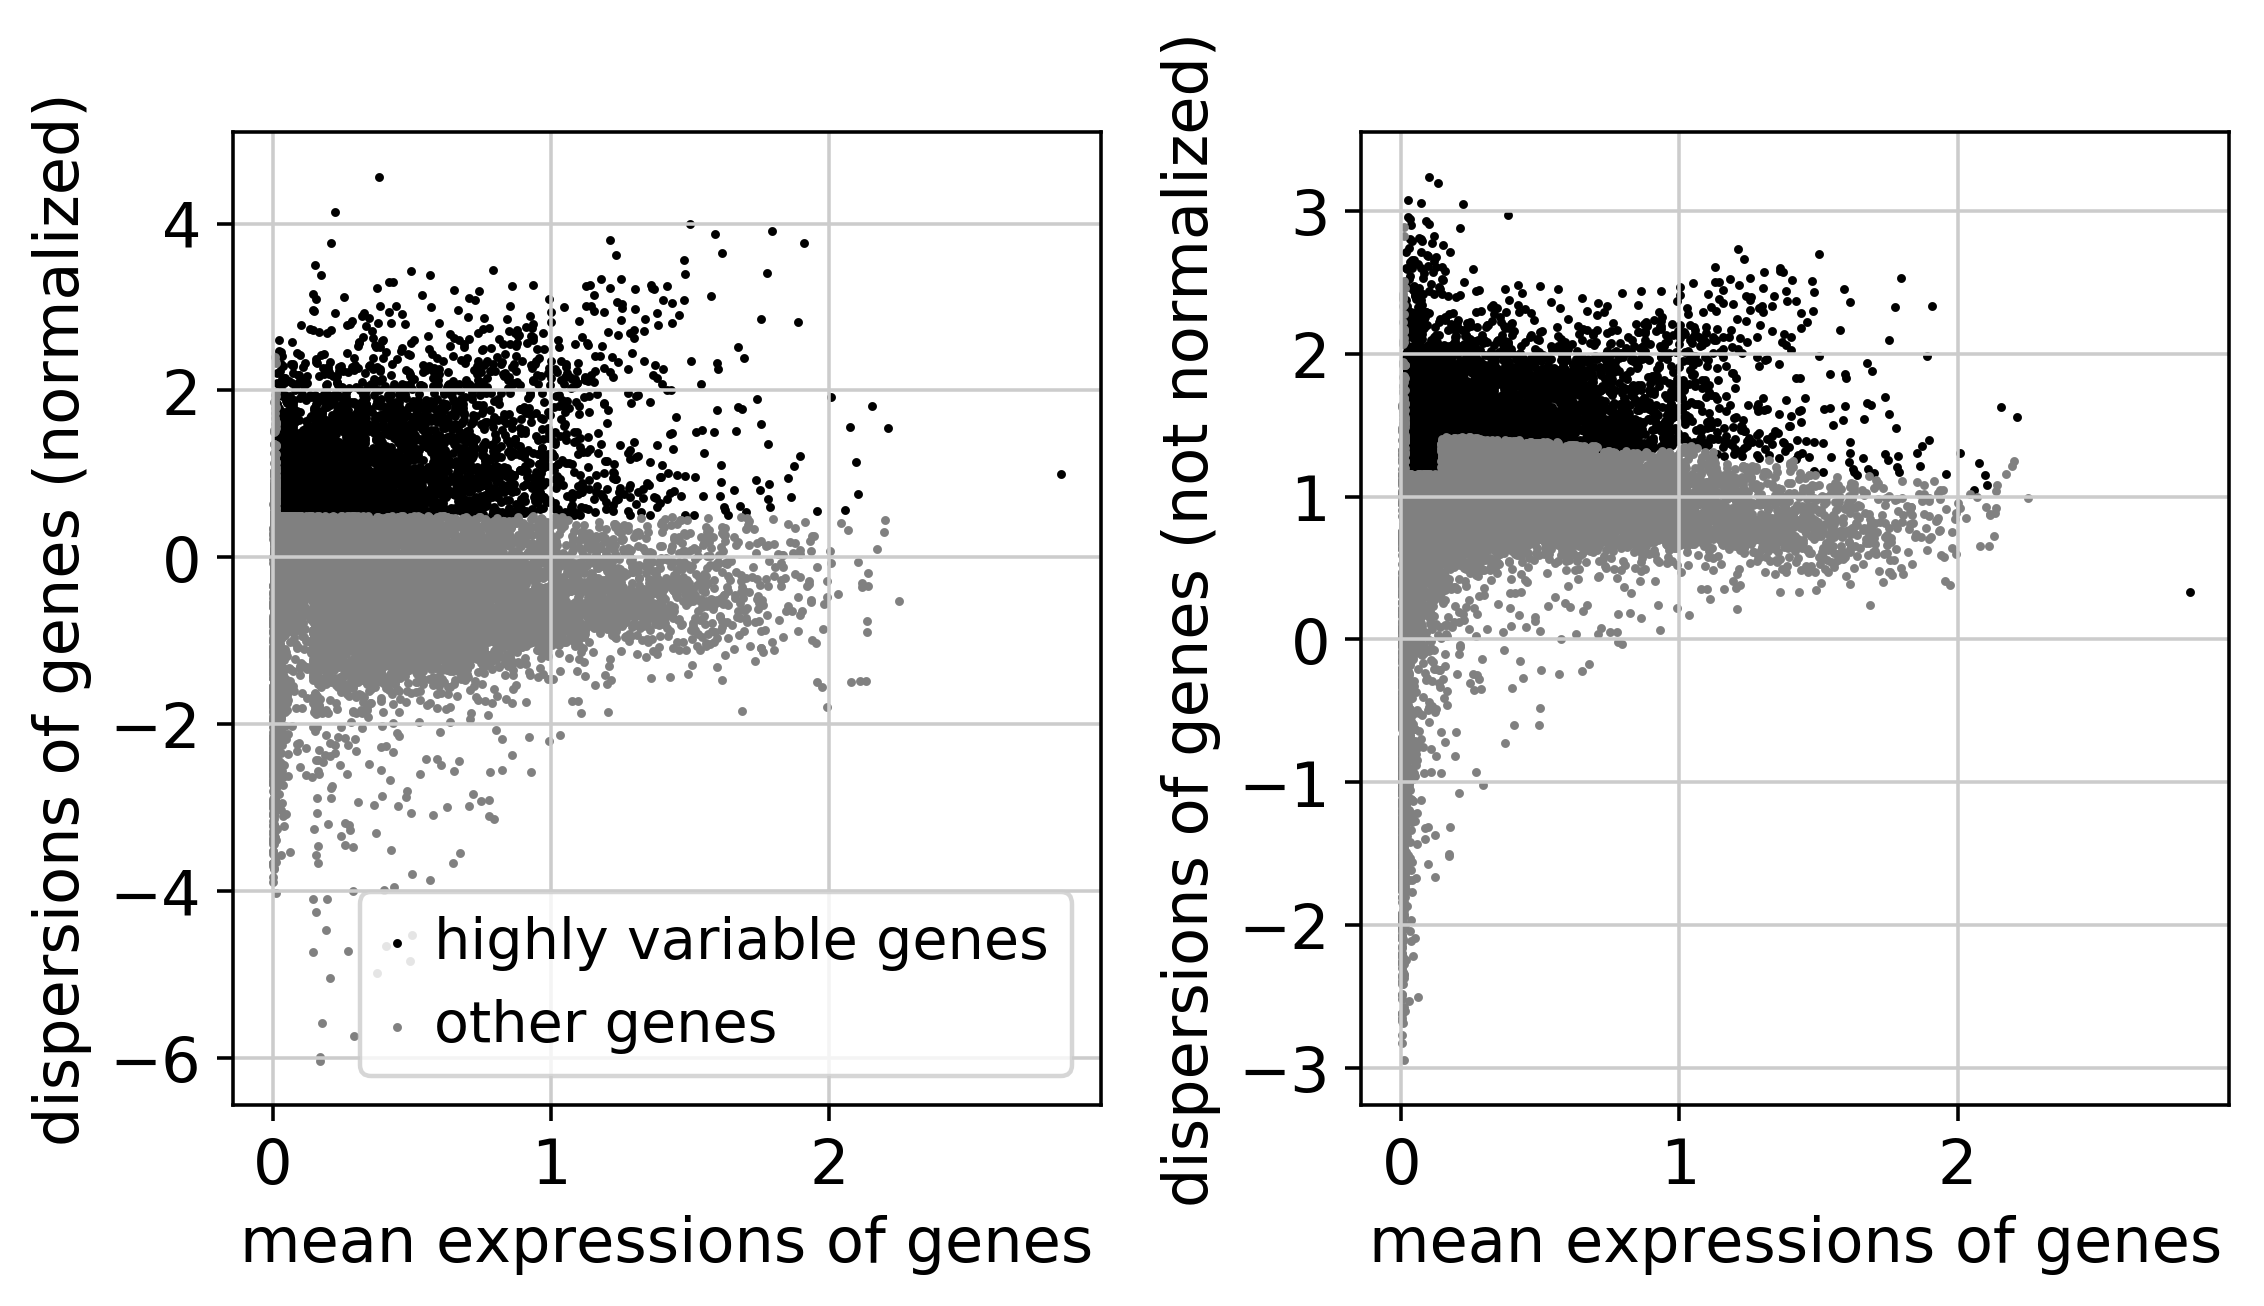

In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

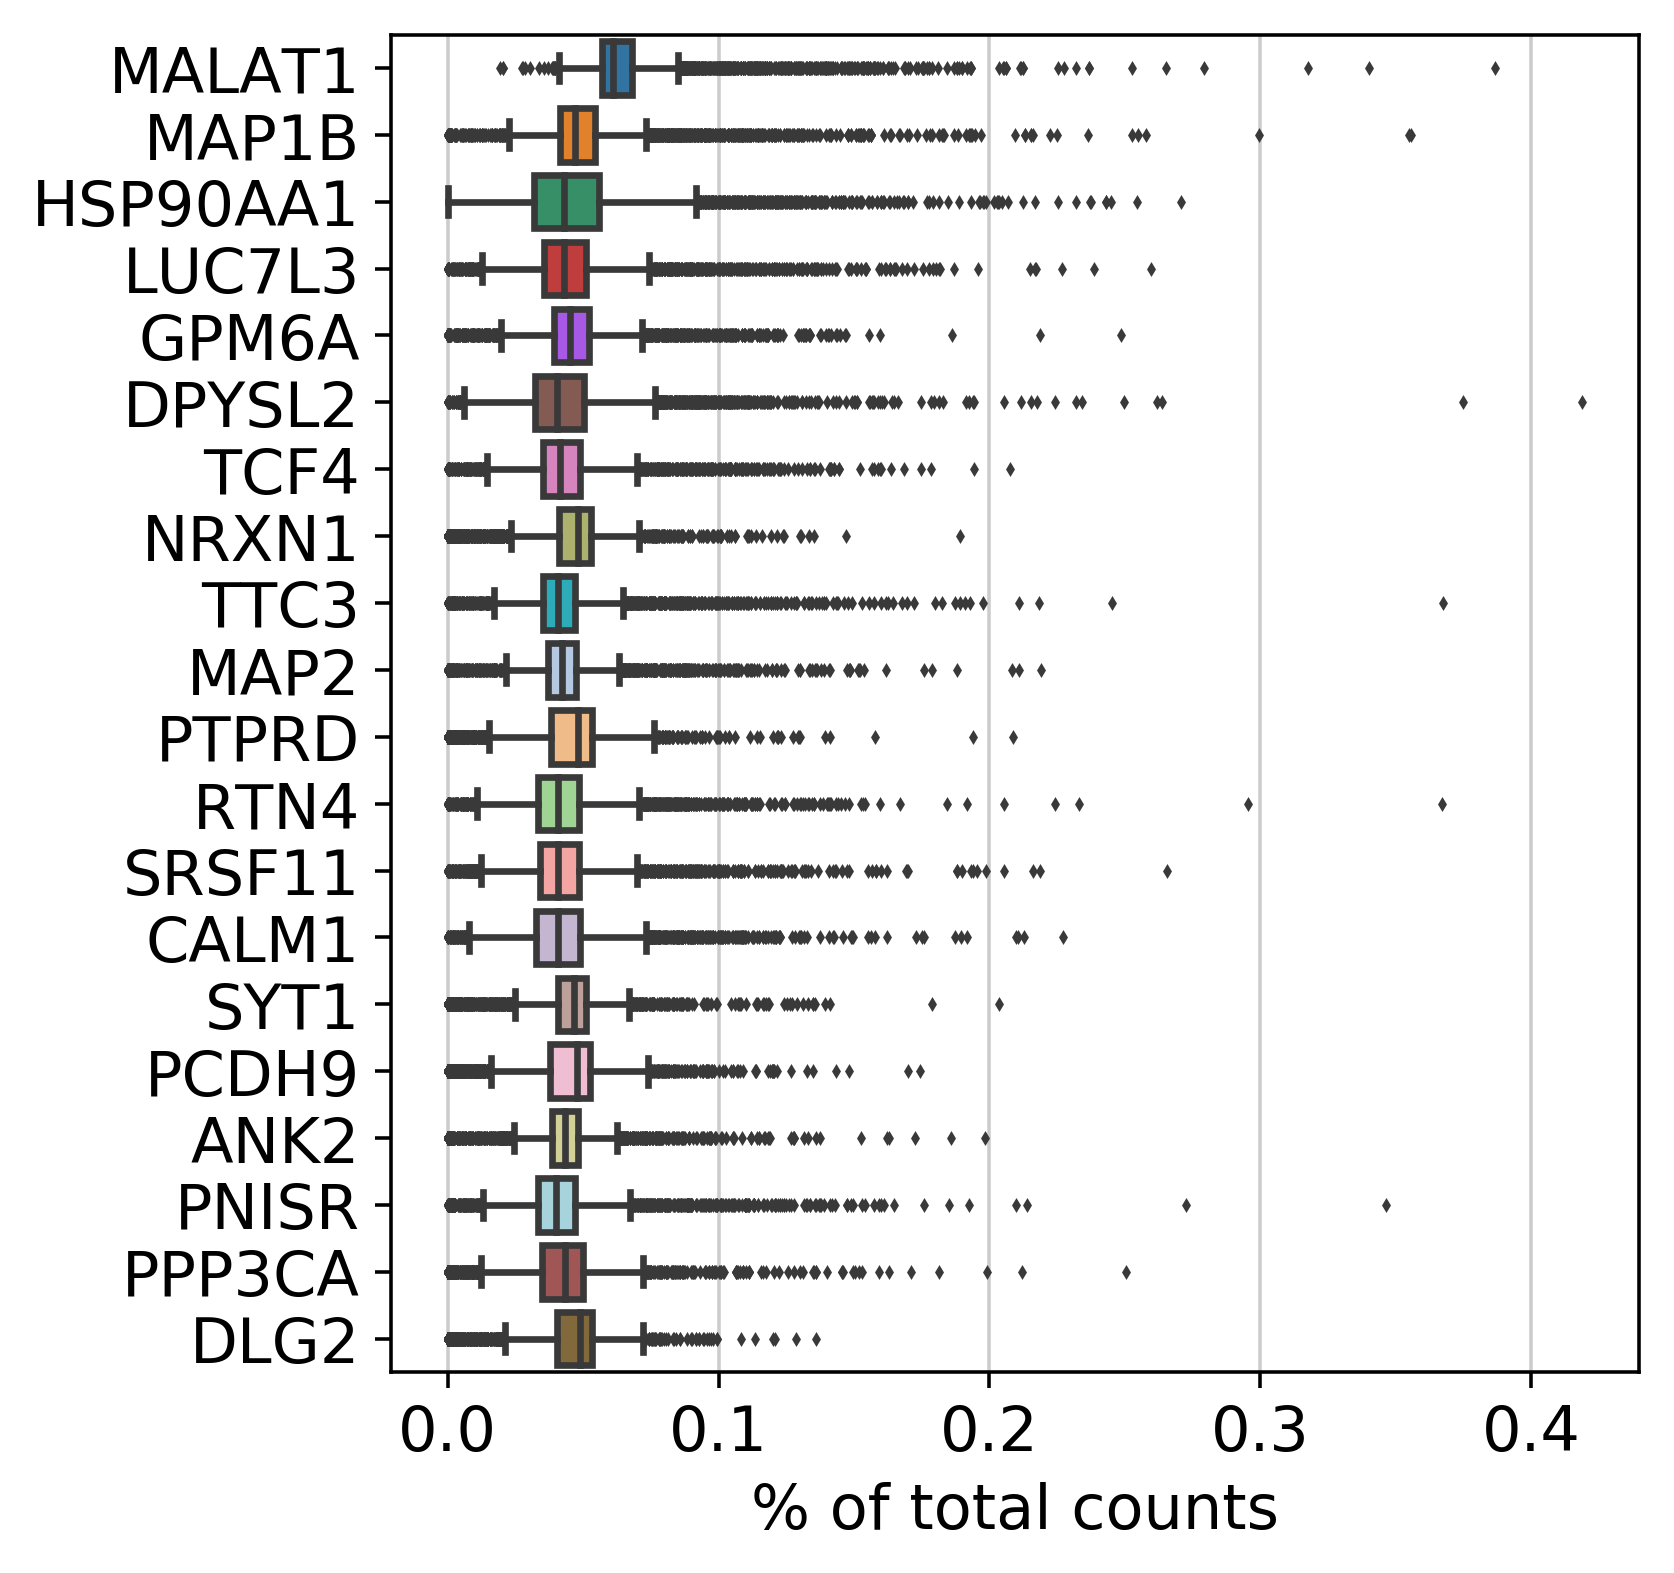

In [19]:
sc.pl.highest_expr_genes(adata, n_top=20)

computing PCA on highly variable genes


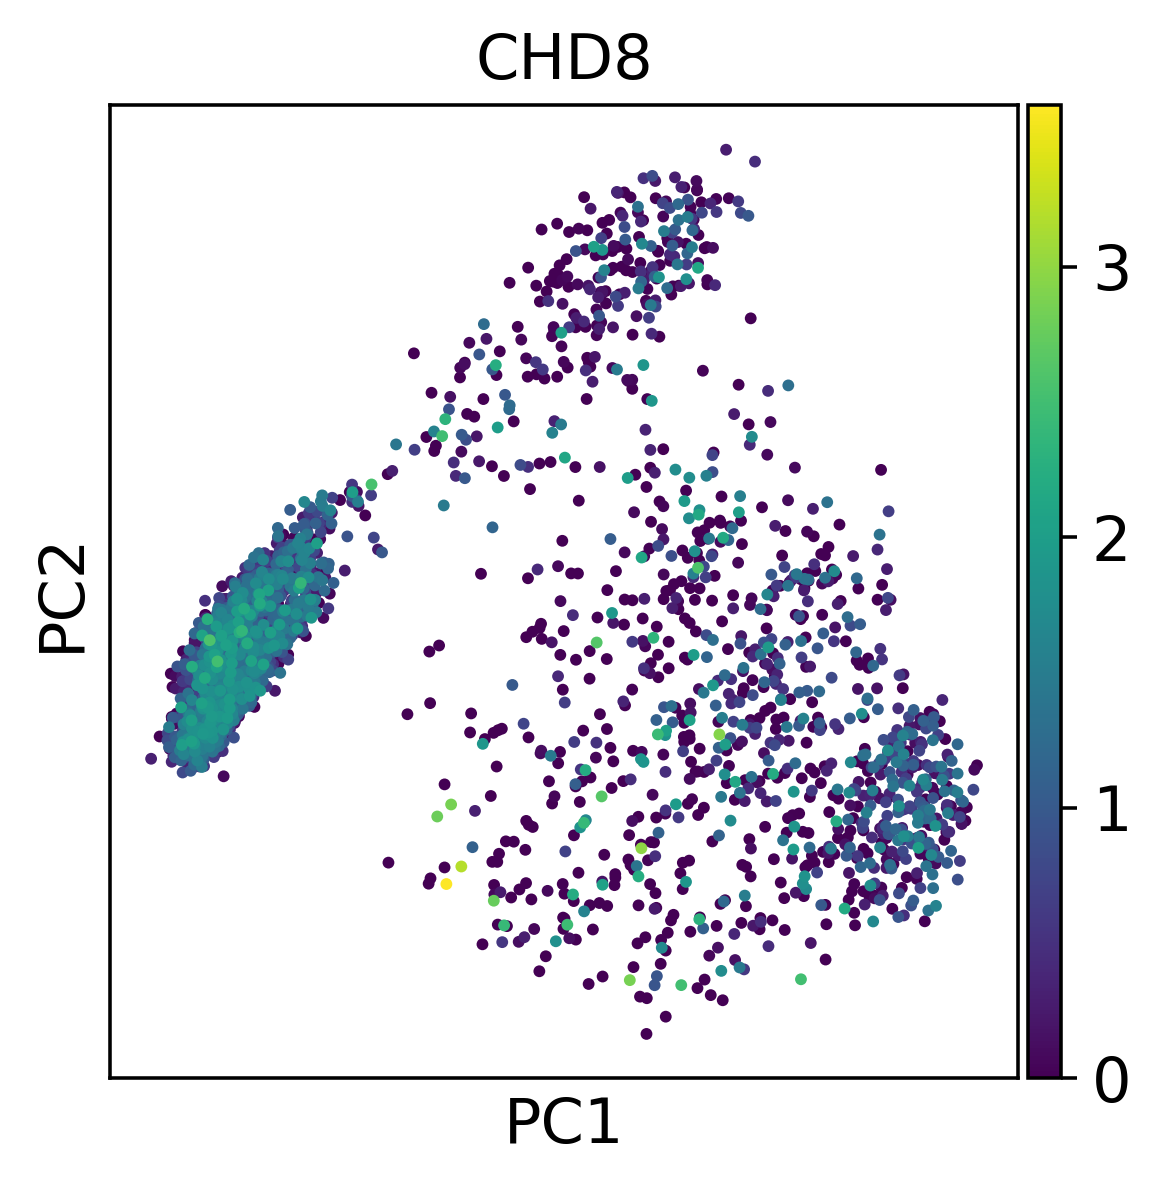

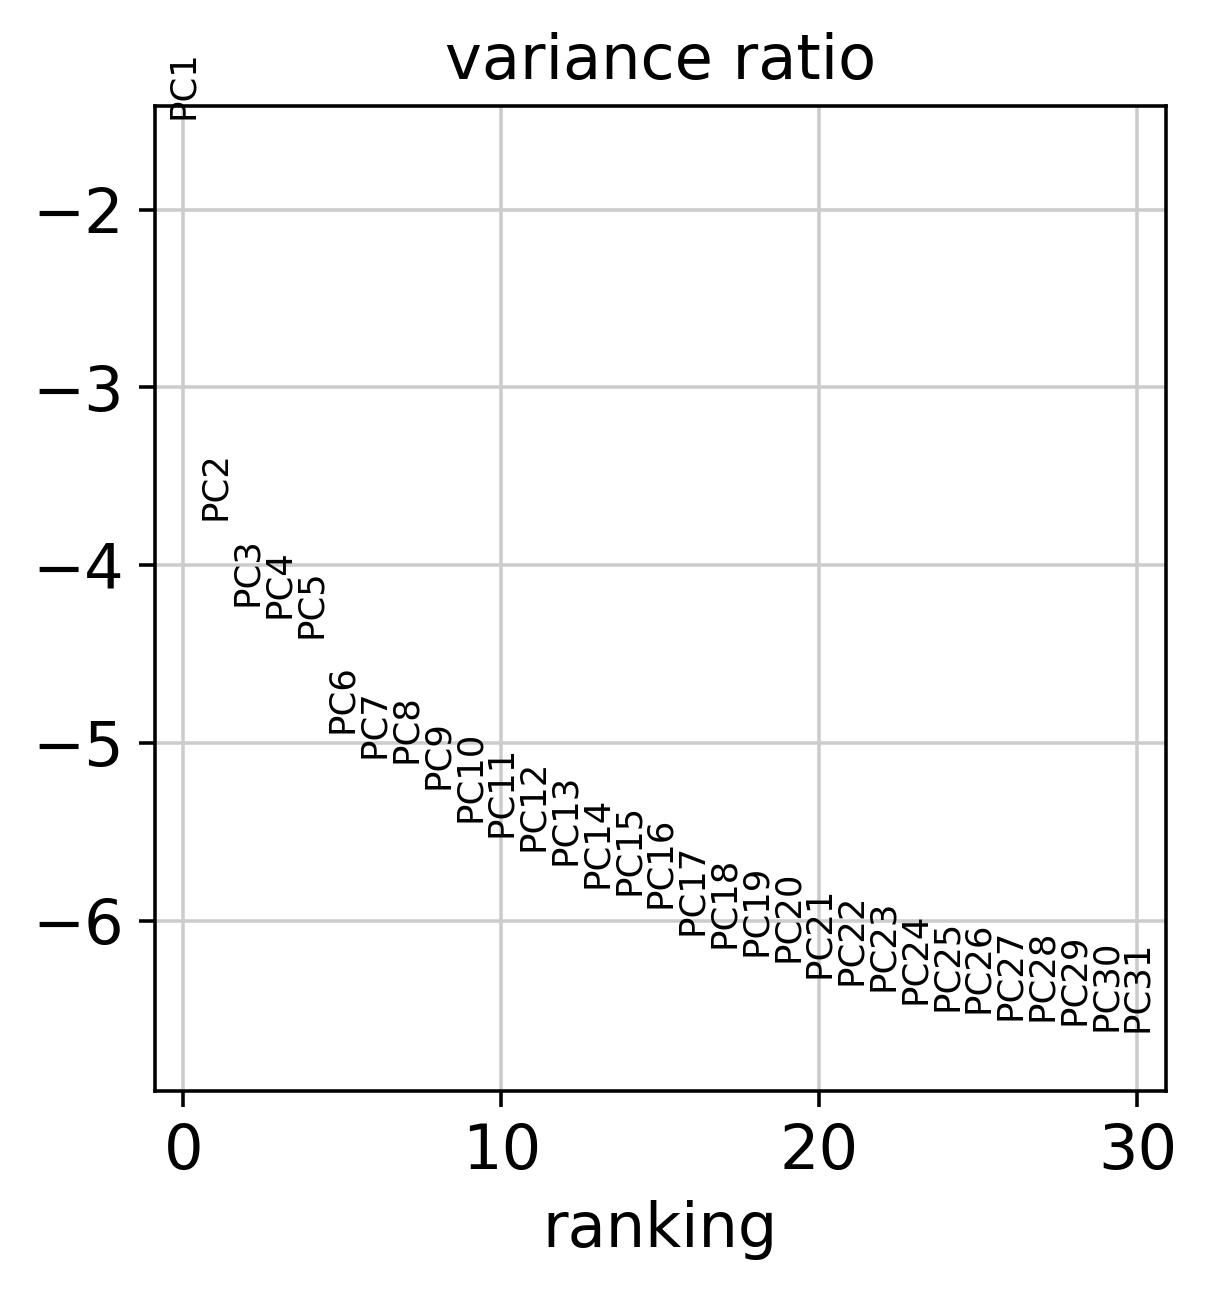

In [20]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CHD8')
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
#sc.tl.tsne(adata, use_rep='X_pca', n_pcs=20)
sc.tl.tsne(adata, use_rep='X')

computing tSNE
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:02:57.32) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


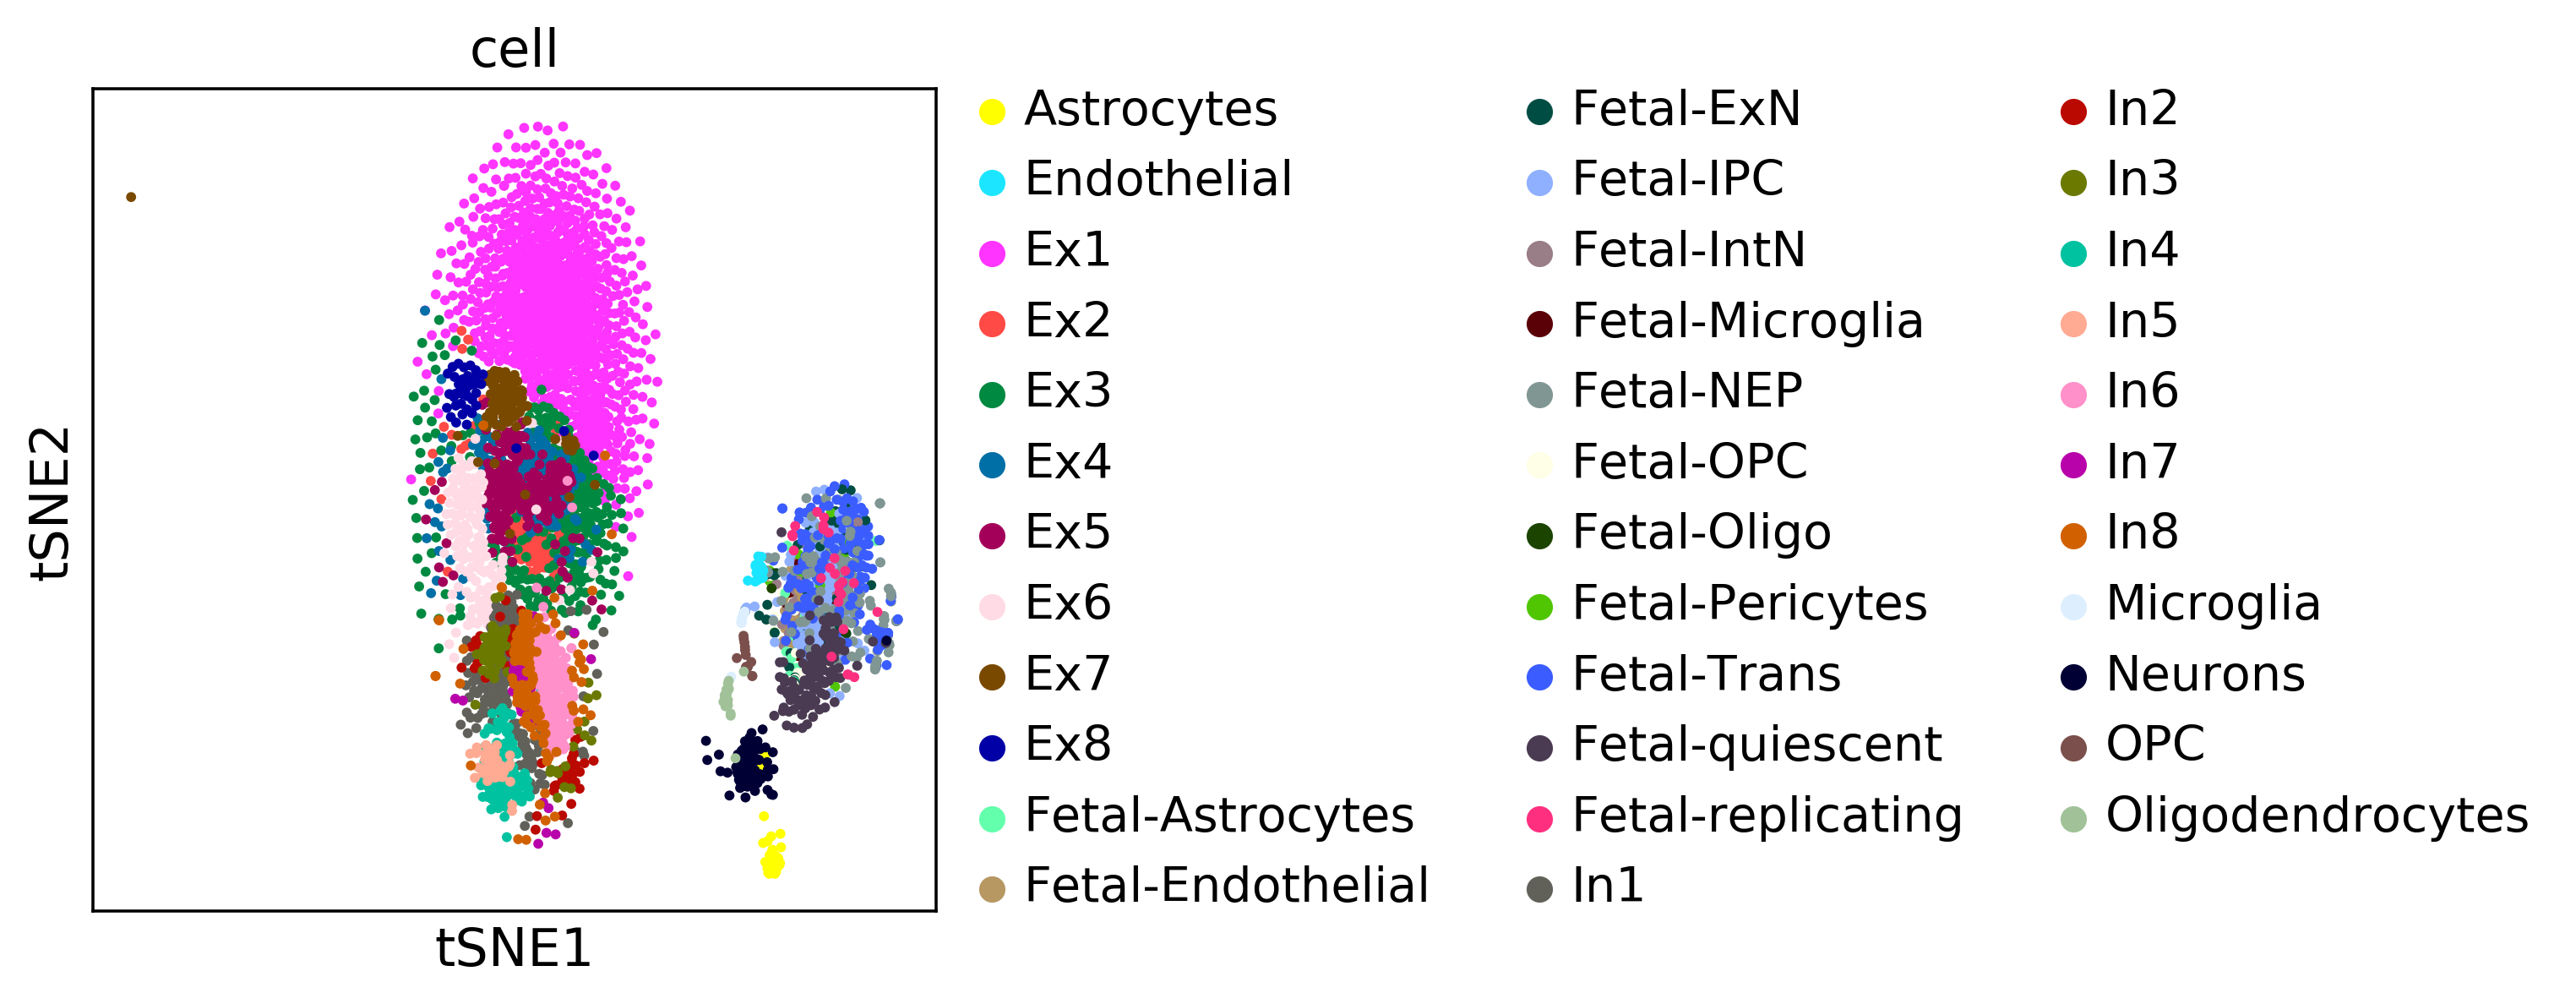

In [22]:
sc.pl.tsne(adata, color='cell')

In [23]:
adata.write(results_file)